# Exploratory Data Analysis for test data

### Importación de datos y librerías

In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML

C:\Users\henry\AppData\Local\Temp\ipykernel_16180\1582991288.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [6]:
test_data = os.path.join(data_path2, "test_adata.h5ad")
adata_test = sc.read_h5ad(test_data)


## Exploration and observation of the data

In [5]:
print(adata_test)


AnnData object with n_obs × n_vars = 30474 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    obsm: 'isotypes_htos', 'protein_expression'


In [8]:
adata_test.shape

(30474, 13553)

### 📌 Explanation of the Variables in `adata_test.obs`

| **Column**             | **Description** |
|------------------------|----------------|
| **`batch_indices`**    | Numerical index of the experimental batch the cell belongs to. Helps identify samples from different experiments. |
| **`n_genes`**          | Number of detected genes in each cell. Indicates gene expression diversity. |
| **`percent_mito`**     | Percentage of mitochondrial genes in the cell. A high value may indicate cellular stress or dead cells. |
| **`leiden_subclusters`** | Cluster assigned to the cell using the **Leiden algorithm**, which detects subpopulations within the data. |
| **`cell_types`**       | The assigned cell type, such as **NKT (Natural Killer T cells)**, **CD8 T cells**, **B cells**, etc. |
| **`tissue`**          | The tissue the cell comes from, such as **Spleen** or **Lymph Node**. |
| **`batch`**           | Identifier of the original experimental batch, e.g., **SLN111-D1**. It may represent samples from different experiments or patients. |

---

### 📌 Example of Data Interpretation

Each row represents **an individual cell** with its characteristics:

#### **Example 1**
- **Cell ID**: `AAACCCAAGGGTAATT-1`
- **Leiden cluster**: `12,0`
- **Cell type**: **NKT (Natural Killer T cell)**
- **Tissue**: **Spleen**
- **Experimental batch**: **SLN111-D1**

#### **Example 2**
- **Cell ID**: `AAACCCACAGATACCT-1`
- **Leiden cluster**: `4`
- **Cell type**: **Mature B (mature B cell)**
- **Tissue**: **Lymph Node**
- **Experimental batch**: **SLN111-D1**


In [11]:
adata_test.obs.info

<bound method DataFrame.info of                     batch_indices  n_genes  percent_mito leiden_subclusters  \
index                                                                         
AAACCCAAGGGTAATT-1              0     3137      0.062138               12,0   
AAACCCAAGGTAAACT-1              0     2256      0.057545                  6   
AAACCCACACTAGGTT-1              0     1367      0.058373                  3   
AAACCCACAGATACCT-1              0     1567      0.065386                  4   
AAACCCACAGGAATAT-1              0     1895      0.059644                  0   
...                           ...      ...           ...                ...   
TTTGTTGGTGGGCTCT-2              1      785      0.106437                  7   
TTTGTTGTCAAATAGG-2              1      979      0.050457                  2   
TTTGTTGTCACGAGGA-2              1      747      0.070362                  0   
TTTGTTGTCTCGACCT-2              1      920      0.044903                 13   
TTTGTTGTCTTGGTCC-2  

In [12]:
print(adata_test.obs.head())


                    batch_indices  n_genes  percent_mito leiden_subclusters  \
index                                                                         
AAACCCAAGGGTAATT-1              0     3137      0.062138               12,0   
AAACCCAAGGTAAACT-1              0     2256      0.057545                  6   
AAACCCACACTAGGTT-1              0     1367      0.058373                  3   
AAACCCACAGATACCT-1              0     1567      0.065386                  4   
AAACCCACAGGAATAT-1              0     1895      0.059644                  0   

                        cell_types      tissue      batch  
index                                                      
AAACCCAAGGGTAATT-1             NKT      Spleen  SLN111-D1  
AAACCCAAGGTAAACT-1    CD122+ CD8 T      Spleen  SLN111-D1  
AAACCCACACTAGGTT-1  Transitional B      Spleen  SLN111-D1  
AAACCCACAGATACCT-1        Mature B  Lymph_Node  SLN111-D1  
AAACCCACAGGAATAT-1           CD4 T  Lymph_Node  SLN111-D1  


In [13]:
print(adata_test.var.head())


Empty DataFrame
Columns: []
Index: [Mrpl15, Lypla1, Tcea1, Atp6v1h, Rb1cc1]


In [16]:
# 4️⃣ 🧬 Número de genes y células
print(f"Number of cells: {adata_test.n_obs}")
print(f"Number of genes: {adata_test.n_vars}")

Number of cells: 30474
Number of genes: 13553


### Univariate Analysis

In [26]:
display(HTML(adata_test.obs.describe(include='all').to_html()))


,batch_indices,n_genes,percent_mito,leiden_subclusters,cell_types,tissue,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
count,30474.000000,30474.000000,30474.000000,30474,30474,30474,30474,30474.000000,30474.000000,30474.000000,30474.000000,30474.000000,30474.000000,30474.000000,30474.000000
unique,NaN,NaN,NaN,34,27,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,0,Mature B,Spleen,SLN111-D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,5179,9936,16423,8736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.442115,1437.539575,0.061535,NaN,NaN,NaN,NaN,1436.073341,7.192609,4013.372070,8.140994,38.211286,50.788698,61.207695,76.479128
std,0.496646,578.810732,0.017958,NaN,NaN,NaN,NaN,577.547021,0.398395,2513.746826,0.558468,5.065329,5.532540,5.194998,5.937365
min,0.000000,203.000000,0.000000,NaN,NaN,NaN,NaN,199.000000,5.298317,498.000000,6.212606,18.742272,25.589479,33.538552,47.112284
25%,0.000000,985.000000,0.050233,NaN,NaN,NaN,NaN,984.000000,6.892642,2307.000000,7.744137,34.897781,47.323736,58.047471,72.859081
50%,0.000000,1381.000000,0.059756,NaN,NaN,NaN,NaN,1380.000000,7.230563,3468.000000,8.151622,38.088272,50.923893,61.523675,75.905396
75%,1.000000,1759.000000,0.071133,NaN,NaN,NaN,NaN,1758.000000,7.472501,5069.750000,8.531244,41.423292,54.423335,64.669530,79.611450


# Genes detected per cell

- The **peak around 1000-1500 genes per cell** suggests that most cells express a moderate number of genes.
- The **long tail towards higher gene counts** may indicate:
  - **Highly active cells** with robust transcription.
  - **Technical variation**, where certain cells capture more RNA molecules.
- The **low-gene count cells on the left** could represent:
  - **Low-quality or dying cells** with reduced gene expression.
  - **Doublets or multiplets** affecting gene detection.


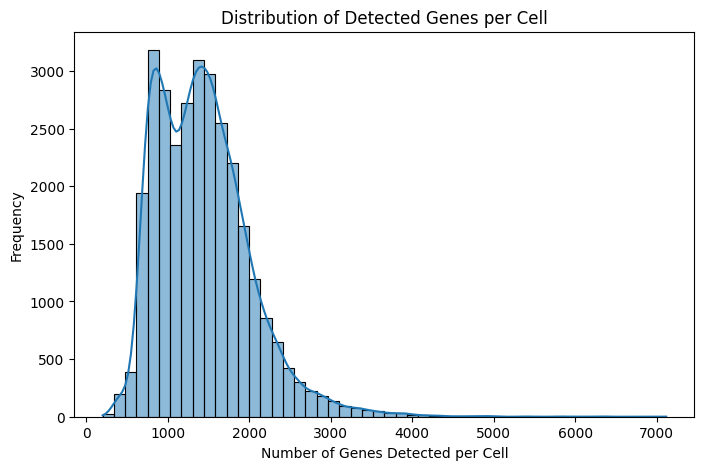

In [27]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(adata_test.obs["n_genes"], bins=50, kde=True)
plt.xlabel("Number of Genes Detected per Cell")
plt.ylabel("Frequency")
plt.title("Distribution of Detected Genes per Cell")
plt.show()

### Cell type and percentage distribution


- **Key Observations**:
  - **Mature B cells** account for over **30%** of the dataset.
  - **CD4 T cells** contribute around **15%**, while **CD8 T cells** make up slightly less.
  - **Other immune cells (e.g., Neutrophils, Monocytes, Macrophages, and Dendritic Cells)** have relatively smaller proportions.
  - The **color gradient** highlights differences in abundance, with **blue indicating more frequent cell types** and **red indicating rare cell types**.


C:\Users\henry\AppData\Local\Temp\ipykernel_20836\767820716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)
C:\Users\henry\AppData\Local\Temp\ipykernel_20836\767820716.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, ax=axes[1], palette="coolwarm", order = percentages.index)


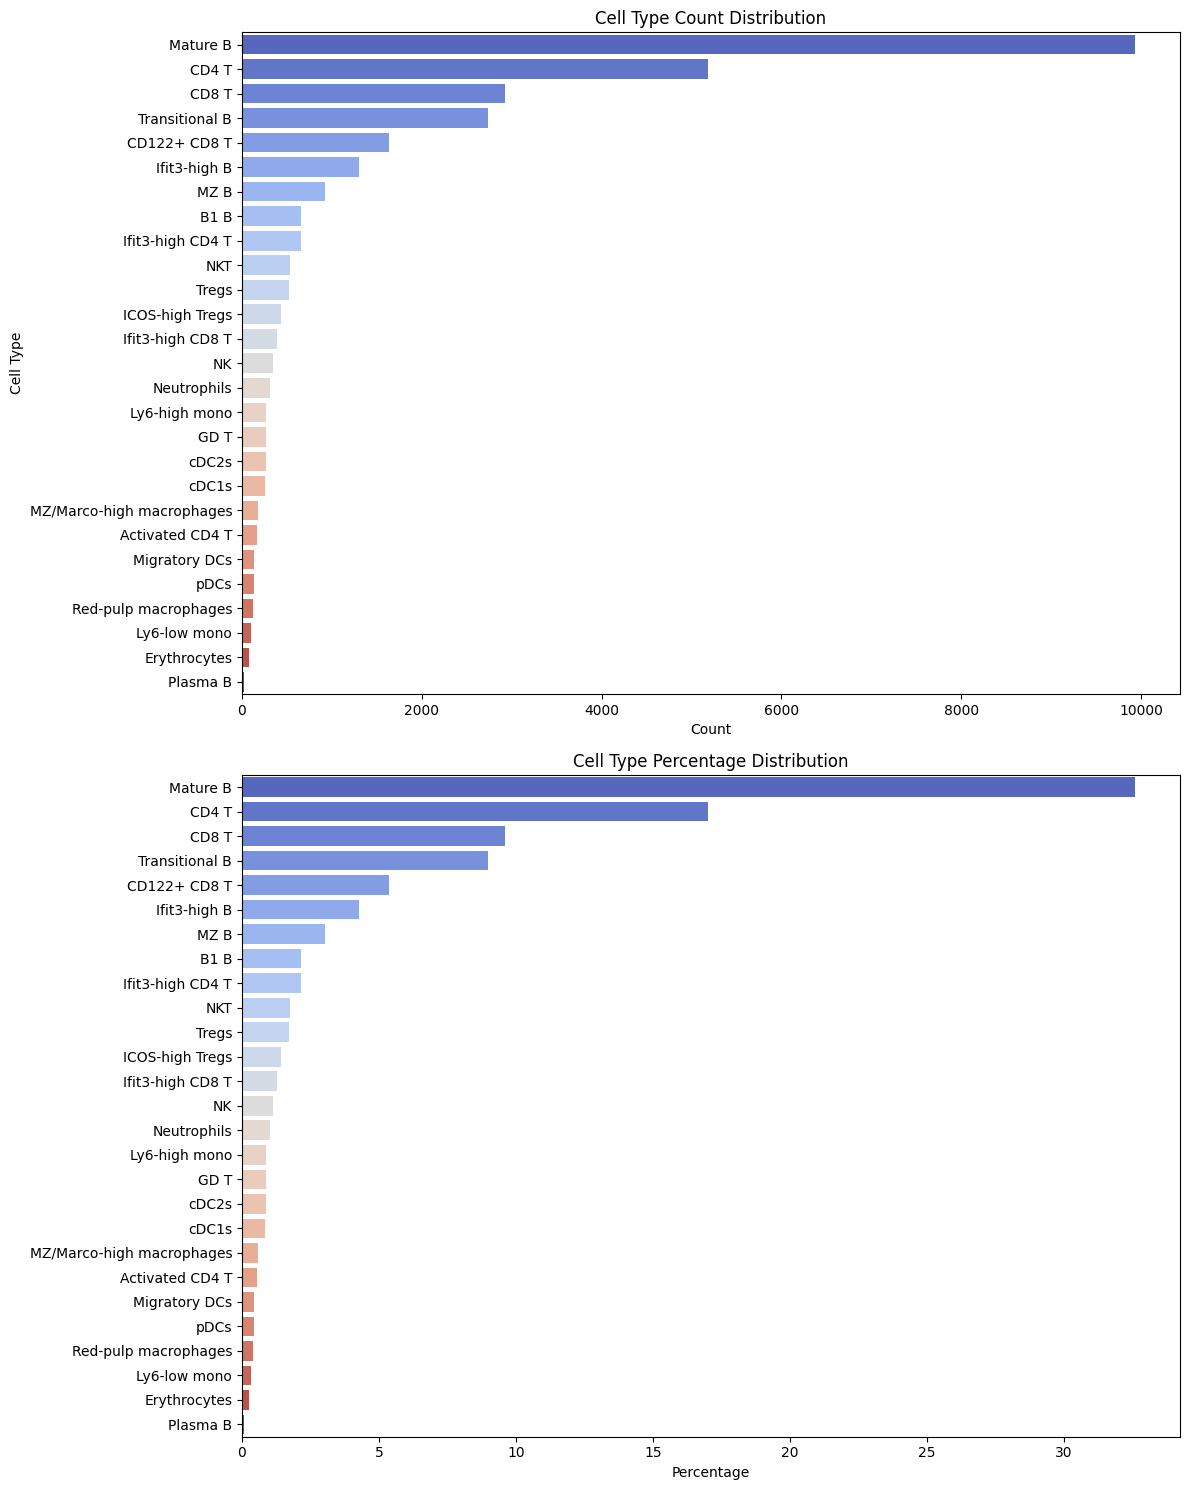

In [35]:
cell_counts = adata_test.obs['cell_types'].value_counts()
percentages = (cell_counts / cell_counts.sum()) * 100
fig, axes = plt.subplots(2, 1, figsize=(12, 15))


# Left plot: Bar count of cell types
sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Cell Type")
axes[0].set_title("Cell Type Count Distribution")

# Right plot: Percentage barplot in descending order with coolwarm
sns.barplot(x=percentages.values, y=percentages.index, ax=axes[1], palette="coolwarm", order = percentages.index)
axes[1].set_xlabel("Percentage")
axes[1].set_ylabel("")
axes[1].set_title("Cell Type Percentage Distribution")

plt.tight_layout()
plt.show()

  - **Mature B cells** make up **41.9%** of the dataset, indicating a strong dominance.
  - **CD4 T cells** comprise **21.8%**, reinforcing their substantial presence.
  - **CD8 T cells account for 12.3%**, and **Transitional B cells make up 11.5%**.
  - **CD122+ CD8 T cells** and **Ifit3-high B cells** contribute **6.9% and 5.5%**, respectively.


C:\Users\henry\AppData\Local\Temp\ipykernel_20836\3906686963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)


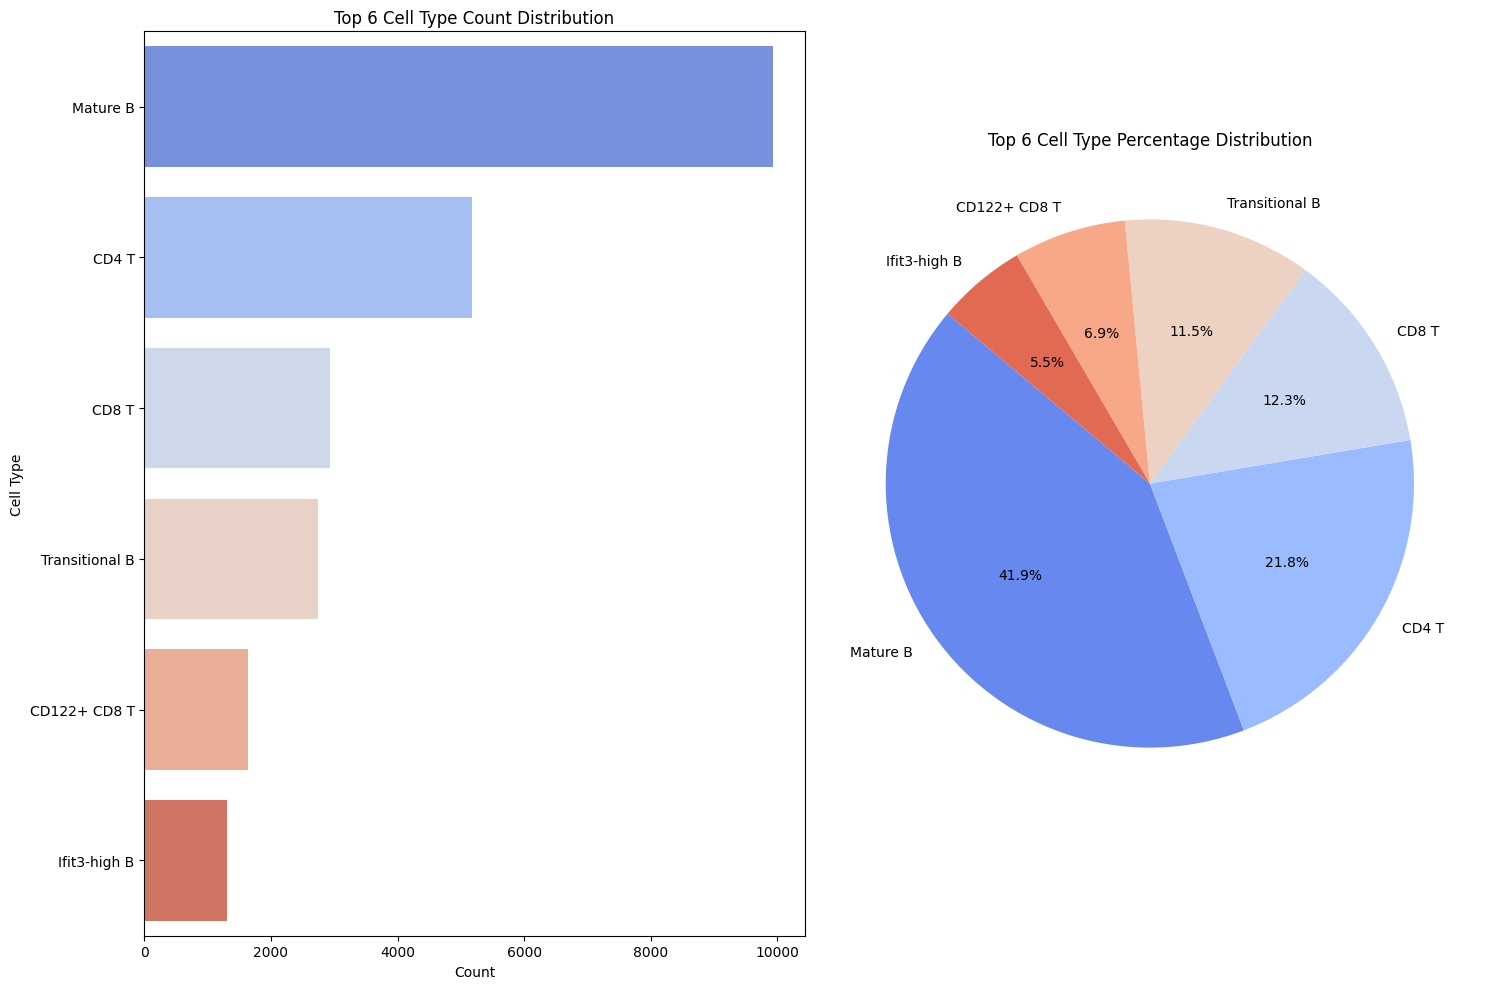

In [38]:
# Get the top 6 most frequent cell types
cell_counts = adata_test.obs['cell_types'].value_counts().head(6)
percentages = (cell_counts / cell_counts.sum()) * 100  # Convert to percentage

# Create a 2x1 subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Top plot: Bar count of top 6 cell types
sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Cell Type")
axes[0].set_title("Top 6 Cell Type Count Distribution")

# Bottom plot: Pie chart of top 6 cell type percentages
axes[1].pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 6), startangle=140)
axes[1].set_title("Top 6 Cell Type Percentage Distribution")

plt.tight_layout()
plt.show()

### Mitochondrial distribution


  - The **peak of the histogram** occurs at approximately **6%**, aligning with the median in the violin plot.
  - Some cells have **higher mitochondrial percentages (~10-15%)**, possibly indicating stressed or dying cells.

- **Low mitochondrial gene percentage** is expected in healthy cells, while **high percentages** may indicate cell stress or apoptosis.


C:\Users\henry\AppData\Local\Temp\ipykernel_20836\2797744079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=adata_test.obs["percent_mito"], ax=axes[0], orient="h", palette="coolwarm")


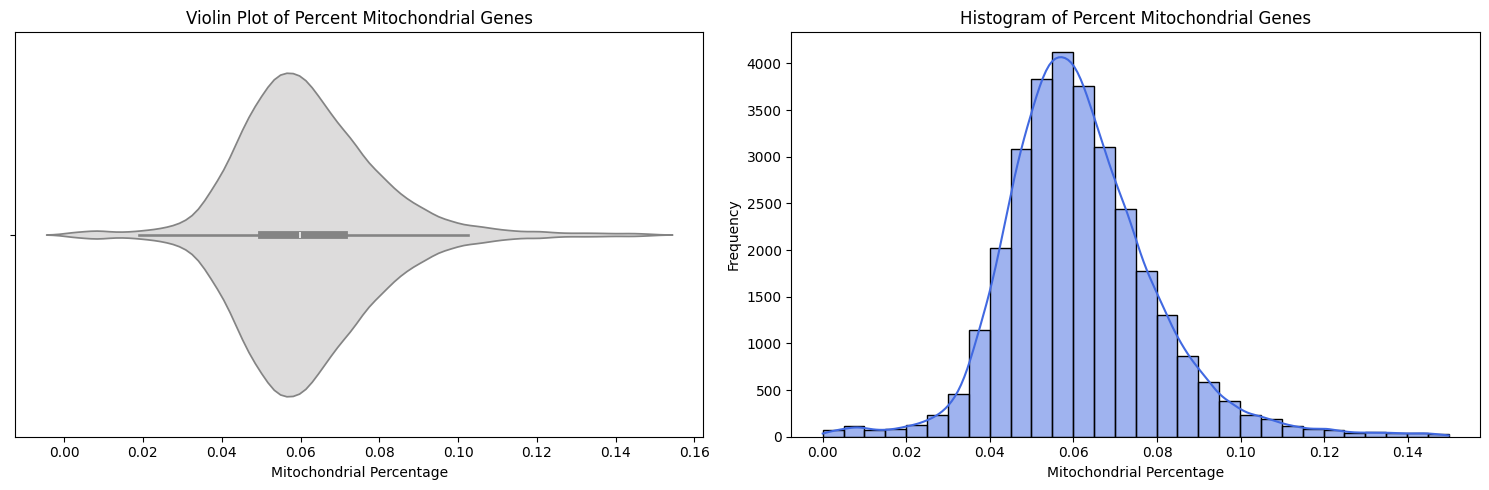

In [40]:
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Horizontal violin plot
sns.violinplot(x=adata_test.obs["percent_mito"], ax=axes[0], orient="h", palette="coolwarm")
axes[0].set_xlabel("Mitochondrial Percentage")
axes[0].set_title("Violin Plot of Percent Mitochondrial Genes")

# Right plot: Histogram
sns.histplot(adata_test.obs["percent_mito"], bins=30, kde=True, ax=axes[1], color="royalblue")
axes[1].set_xlabel("Mitochondrial Percentage")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Percent Mitochondrial Genes")

plt.tight_layout()
plt.show()

### Tissue count distribution

  - **Spleen** accounts for **53.9%** of the total samples.
  - **Lymph Node** accounts for **46.1%** of the total samples.

C:\Users\henry\AppData\Local\Temp\ipykernel_20836\3198639555.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tissue_counts.values, y=tissue_counts.index, ax=axes[0], palette="coolwarm", order=tissue_counts.index)


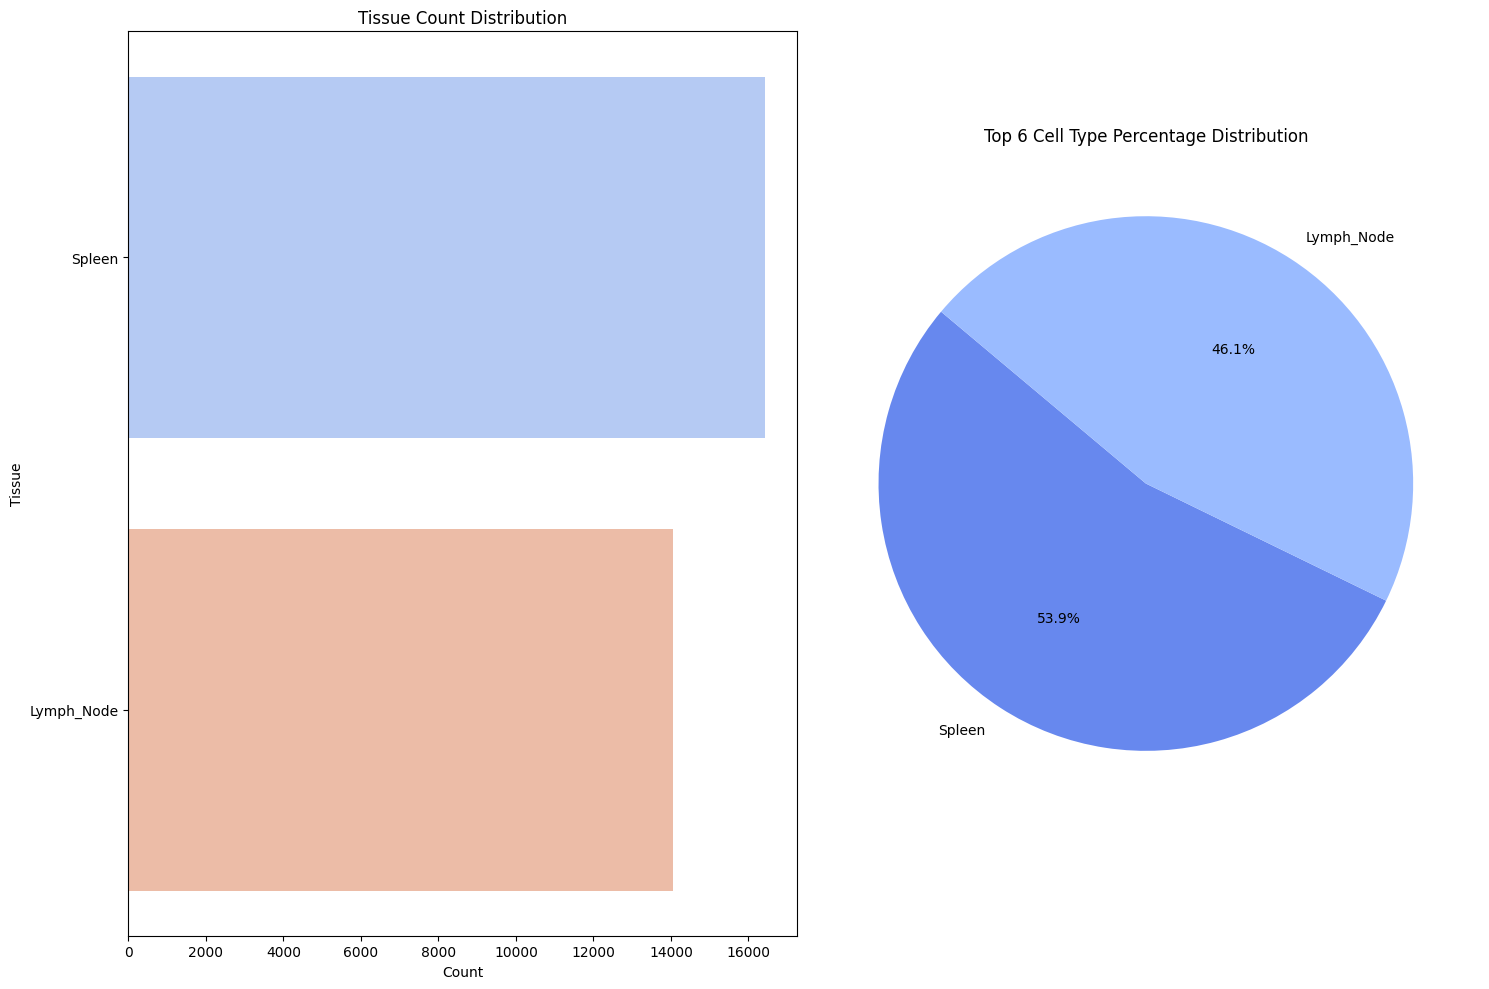

In [45]:
tissue_counts = adata_test.obs['tissue'].value_counts()
percentages = (tissue_counts / tissue_counts.sum()) * 100
fig, axes = plt.subplots(1, 2, figsize=(15, 10))


# Left plot: Bar count of cell types
sns.barplot(x=tissue_counts.values, y=tissue_counts.index, ax=axes[0], palette="coolwarm", order=tissue_counts.index)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Tissue")
axes[0].set_title("Tissue Count Distribution")

# Bottom plot: Pie chart of top 6 cell type percentages
axes[1].pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 6), startangle=140)
axes[1].set_title("Top 6 Cell Type Percentage Distribution")

plt.tight_layout()
plt.show()

### Bivariate analysis

#### Statistic summary

| Statistic       | Lymph_Node (Blue) | Spleen (Orange) |
|----------------|------------------|----------------|
| **Mean**       | ~1300–1500        | ~1200–1400    |
| **Median**     | ~1200             | ~1100         |
| **Mode**       | ~1000             | ~900          |
| **IQR (Q1–Q3)** | ~800–2000        | ~700–1900     |
| **Max Gene Count** | ~6000–7000  | ~6000–7000  |
| **Min Gene Count** | ~0–100       | ~0–100       |

C:\Users\henry\AppData\Local\Temp\ipykernel_20836\1705930934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tissue", y="n_genes", data=adata_test.obs, palette="coolwarm", ax=axes[1])


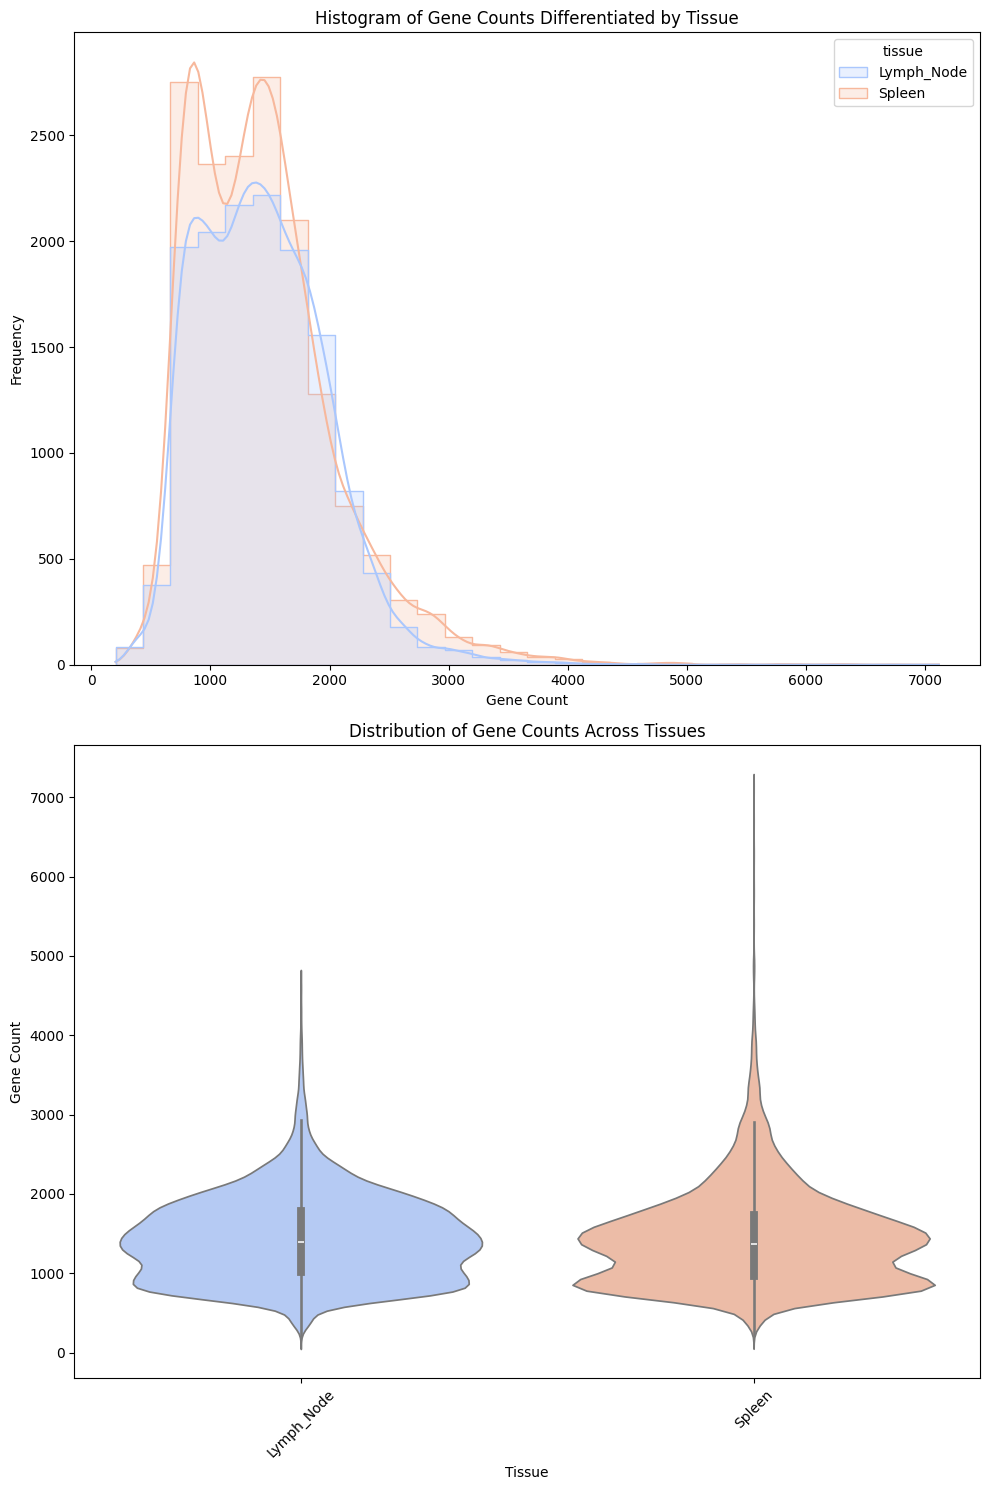

In [48]:
# Create a 1x2 subplot
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Left plot: Histogram of gene counts, differentiated by tissue
sns.histplot(data=adata_test.obs, x="n_genes", hue="tissue", bins=30, kde=True, ax=axes[0], palette="coolwarm", element="step")
axes[0].set_xlabel("Gene Count")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Gene Counts Differentiated by Tissue")

# Right plot: Violin plot of gene count per tissue
sns.violinplot(x="tissue", y="n_genes", data=adata_test.obs, palette="coolwarm", ax=axes[1])
axes[1].set_xlabel("Tissue")
axes[1].set_ylabel("Gene Count")
axes[1].set_title("Distribution of Gene Counts Across Tissues")
axes[1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

### Distribution of gene count for cell type

1. **High Variability:** Cell types like **Neutrophils and DCs** have a **large spread** of gene counts.
2. **Low Variability:** Cells like **Erythrocytes and Tregs** have **more uniform distributions**.
3. **Presence of Outliers:** Many cell types have **significant outliers**, indicating a subset of cells with unusually high gene expression.


C:\Users\henry\AppData\Local\Temp\ipykernel_20836\3393700865.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordered_cell_types = adata_test.obs.groupby("cell_types")["n_genes"].median().sort_values(ascending=False).index
C:\Users\henry\AppData\Local\Temp\ipykernel_20836\3393700865.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cell_types", y="n_genes", data=adata_test.obs, palette="coolwarm")


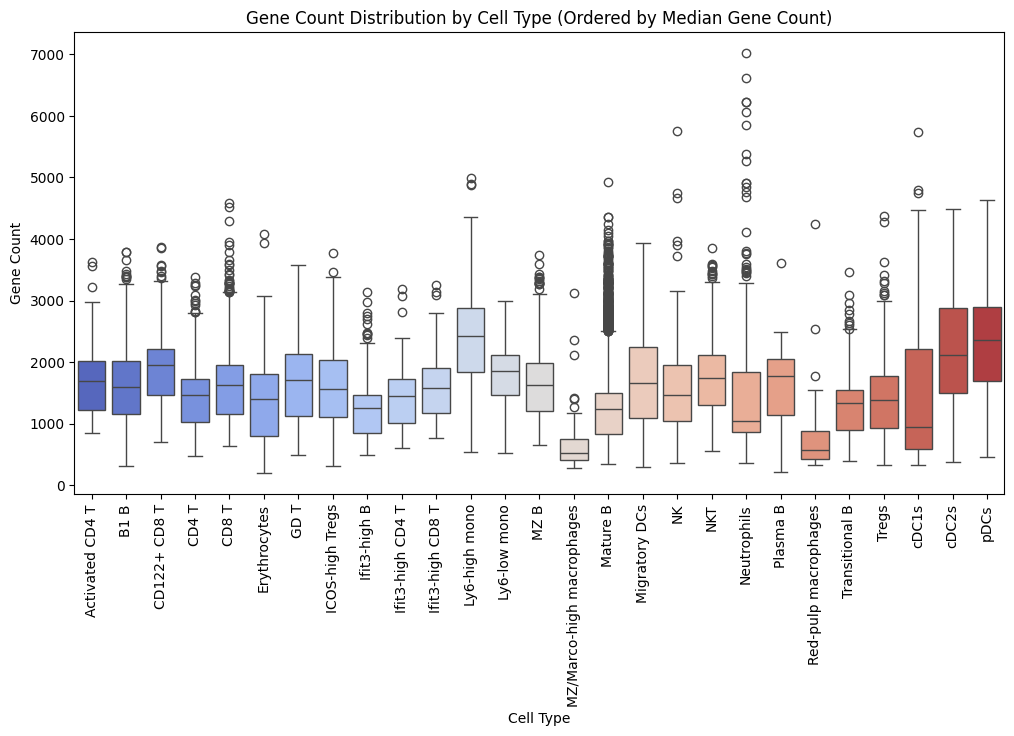

In [ ]:
#  Ordenar cell_types por el promedio de n_genes de mayor a menor
ordered_cell_types = adata_test.obs.groupby("cell_types")["n_genes"].median().sort_values(ascending=False).index
adata_test.obs["cell_types"] = pd.Categorical(adata_test.obs["cell_types"], categories=ordered_cell_types, ordered=True)

# Crear la figura
plt.figure(figsize=(12, 6))

# Diagrama de cajas y bigotes
sns.boxplot(x="cell_types", y="n_genes", data=adata_test.obs, palette="coolwarm")

# Ajustes de etiquetas
plt.xlabel("Cell Type")
plt.ylabel("Gene Count")
plt.title("Gene Count Distribution by Cell Type (Ordered by Median Gene Count)")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad

# Mostrar el gráfico
plt.show()

### Correlations

- **Strong Positive Correlations ( > 0.90)**
  - `n_genes` and `n_genes_by_counts` (**0.96**): Indicates that the number of genes detected strongly correlates with the number of genes counted, as expected.
  - `n_genes` and `log1p_n_genes_by_counts` (**0.96**): Log-transformed values maintain a strong correlation with raw gene counts.
  - `n_genes_by_counts` and `total_counts` (**0.94**): Suggests that higher gene expression is generally associated with an increase in total counts.
  - `log1p_n_genes_by_counts` and `log1p_total_counts` (**0.97**): Log transformation preserves the strong relationship between gene counts and total counts.
  - `pct_counts_in_top_50_genes`, `pct_counts_in_top_100_genes`, `pct_counts_in_top_200_genes`, and `pct_counts_in_top_500_genes` all show strong positive correlations (**0.74 to 0.97**) with each other, implying that cells with high expression in a few genes tend to maintain similar trends across different top-ranked gene categories.

- **Strong Negative Correlations ( < -0.60)**
  - `batch_indices` and `n_genes` (**-0.61**): Suggests that batch effects could be influencing gene detection.
  - `batch_indices` and `n_genes_by_counts` (**-0.61**): Further supports batch-driven variability in gene expression.
  - `batch_indices` and `log1p_n_genes_by_counts` (**-0.67**): Indicates batch effects impact even log-transformed gene counts.
  - `batch_indices` and `log1p_total_counts` (**-0.65**): Batch effects also influence total gene expression.
  - `pct_counts_in_top_500_genes` and `n_genes_by_counts` (**-0.74**) and `log1p_n_genes_by_counts` (**-0.82**): Suggests that when a small number of genes dominate expression, the overall gene count is lower.

- **Moderate Correlations (0.40 to 0.70)**
  - `batch_indices` and `pct_counts_in_top_50_genes` (**0.40**) & `pct_counts_in_top_500_genes` (**0.50**): Indicates that batch effects may influence the concentration of expression in top genes.


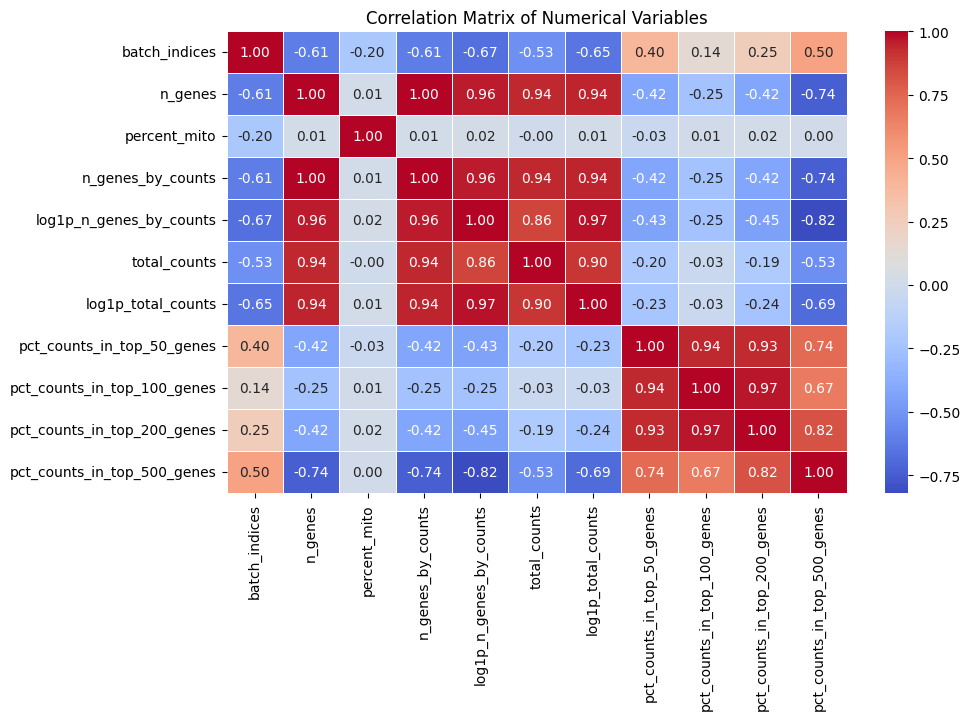

In [55]:
numerical_vars = adata_test.obs.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_vars.corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

### Regression plot

- There is **no strong correlation** between mitochondrial gene percentage and the number of genes detected, as indicated by the flat regression line.
- Some cells with **high mitochondrial gene content** show reduced gene detection, which may indicate **low-quality or dying cells**.

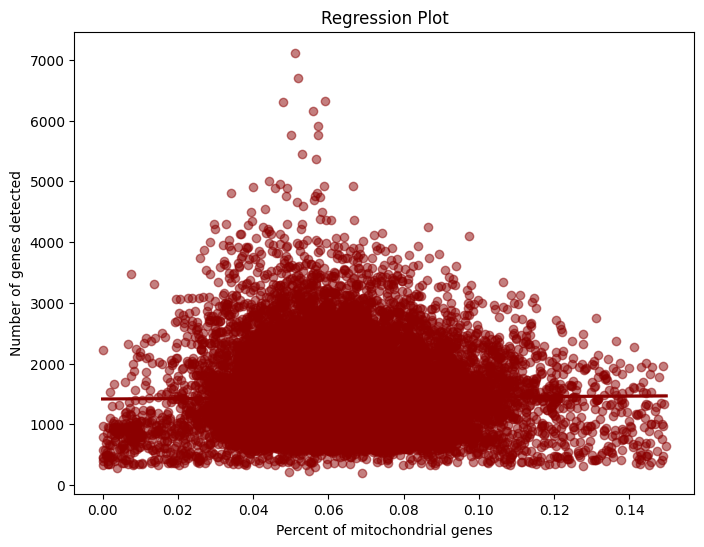

In [10]:
# Create the figure
plt.figure(figsize=(8, 6))

# Replace 'var_x' and 'var_y' with your chosen numerical variables
sns.regplot(x=adata_test.obs['percent_mito'], y=adata_test.obs['n_genes'], color="darkred", scatter_kws={'alpha': 0.5})

# Labels and title
plt.xlabel("Percent of mitochondrial genes")
plt.ylabel("Number of genes detected")
plt.title("Regression Plot")

# Show the plot
plt.show()

## Recommendations for the model

After performing Exploratory Data Analysis (EDA) on the RNA-seq dataset, the next step is to implement a robust feature extraction and dimensionality reduction methodology to optimize clustering performance. The desired methodology involves integrating Variational Autoencoders (VAE) and Generative Adversarial Networks (GAN). The VAE will encode the high-dimensional gene expression data into a meaningful low-dimensional latent space, preserving probabilistic gene relationships. The GAN will further refine this representation, ensuring alignment with biological priors while reducing noise. Once the latent space is optimized, advanced clustering techniques such as Leiden clustering can be applied to improve cell-type classification. 

